In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("sample_data/RealEstatePricePrediction.csv")
df = df.iloc[:,2:]
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [22]:
df.rename(columns={"X3 distance to the nearest MRT station":"Distance to MRT", "X4 number of convenience stores":"Number of Mall"}, inplace=True)

In [24]:
data_X = df.iloc[:,0:5]
data_X

,X2 house age,Distance to MRT,Number of Mall,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [25]:
data_Y = df.iloc[:,5:]
data_Y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [26]:
# Split data train and test
X_train,X_test,y_train,y_test = train_test_split(data_X,data_Y, test_size=0.2)

In [27]:
train_data = X_train.join(y_train)
train_data.corr()

,X2 house age,Distance to MRT,Number of Mall,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,-0.007232,0.057459,0.049898,-0.029392,-0.219646
Distance to MRT,-0.007232,1.000000,-0.597634,-0.569120,-0.760359,-0.676589
Number of Mall,0.057459,-0.597634,1.000000,0.432174,0.411977,0.551218
X5 latitude,0.049898,-0.569120,0.432174,1.000000,0.363319,0.555560
X6 longitude,-0.029392,-0.760359,0.411977,0.363319,1.000000,0.482942
Y house price of unit area,-0.219646,-0.676589,0.551218,0.555560,0.482942,1.000000


<Axes: >

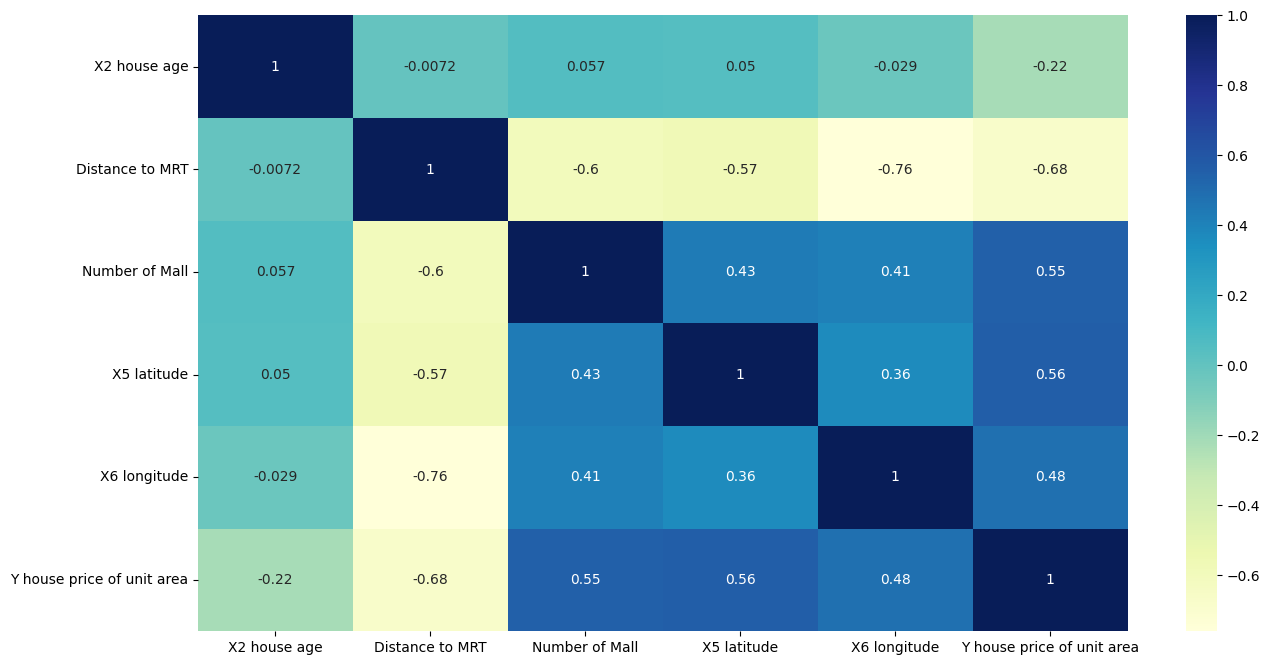

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [29]:
# Train Model Multiple Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print(f'r2 : {r2_score(y_test,prediction)}')

r2 : 0.49246712326921216
